In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap
import xarray as xr
import warnings
warnings.filterwarnings('ignore')
lonmin, lonmax = -180, 180
latmin, latmax = -60, 90
extents = [lonmin, lonmax, latmin, latmax]

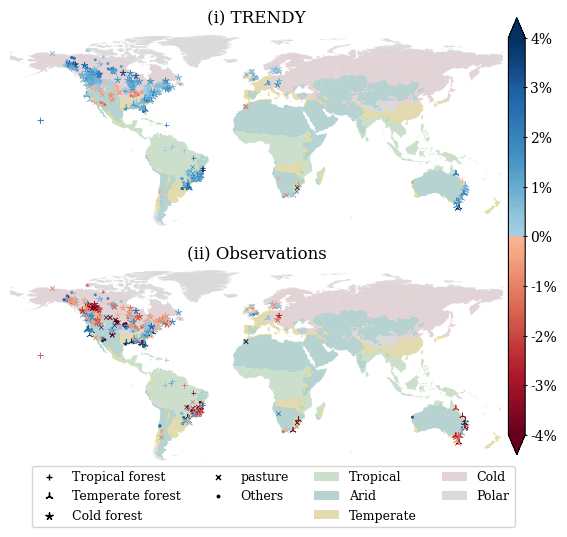

In [2]:
# Plotting Extended Data Fig. 2a (Figure S2a)
def Figure_2a():
    data = pd.read_excel(r"dataset\result.xlsx")
    lon = data['Lon']
    lat = data['Lat']
    T = data['Trendy_CO2_%']
    S = data['Observations_CO2_%']
    climates = data['Main_climate']
    pasture = data['pasture']
    forest = data['forest']
    others = data['Others']
    Index = data['Index']

    climates = climates[Index==1]
    pasture = pasture[Index==1]
    forest = forest[Index==1]
    others = others[Index==1]
    S = S[Index == 1]
    T = T[Index == 1]
    lon = lon[Index == 1]
    lat = lat[Index == 1]

    def draw_picture3(ax1, S, title, l):
        ax1.set_global()
        name = r"dataset\continent_shp\continent.shp"
        shpfile = shpreader.Reader(name)
        shape_feature = cfeature.ShapelyFeature(shpfile.geometries(), crs=ccrs.PlateCarree())
        ax1.add_feature(shape_feature, edgecolor='k', facecolor='#DCDCDC', lw=0, ls=':', alpha=1, zorder=0)

        colorK = plt.get_cmap('RdBu')(np.linspace(0, 1, 300))
        colorneed = colorK[[i for i in range(100)] + [200 + i for i in range(100)]]
        cmap = ListedColormap(colorneed)

        plt.scatter(lon[others==1], lat[others==1], c=S[others==1] * 100, s=10, cmap=cmap, vmin=l[0],
                     vmax=l[-1],
                     marker='.', linewidths=0.5)

        plt.scatter(lon[pasture > 50], lat[pasture > 50], c=S[pasture > 50] * 100, s=10, cmap=cmap, vmin=l[0],
                    vmax=l[-1],
                    marker='x', linewidths=0.5)

        lon2 = lon[climates == 2]
        lat2 = lat[climates == 2]
        forest2 = forest[climates == 2]
        S2 = S[climates == 2]
        plt.scatter(lon2[forest2 > 50], lat2[forest2 > 50], c=S2[forest2 > 50] * 100, s=20, cmap=cmap, vmin=l[0],
                    vmax=l[-1],
                    marker=(3, 2), linewidths=0.5)
        lon1 = lon[climates == 3]
        lat1 = lat[climates == 3]
        forest1 = forest[climates == 3]
        S1 = S[climates == 3]
        plt.scatter(lon1[forest1 > 50], lat1[forest1 > 50], c=S1[forest1 > 50] * 100, s=20, cmap=cmap, vmin=l[0],
                    vmax=l[-1],
                    marker=(5, 2), linewidths=0.5)
        lon3 = lon[climates == 0]
        lat3 = lat[climates == 0]
        forest3 = forest[climates == 0]
        S3 = S[climates == 0]
        plt.scatter(lon3[forest3 > 50], lat3[forest3 > 50], c=S3[forest3 > 50] * 100, s=15, cmap=cmap, vmin=l[0],
                    vmax=l[-1],
                    marker='+', linewidths=0.5, edgecolor='None')

        ax1.axis('off')
        ax1.set_extent(extents, crs=proj)
        plt.xticks(family='serif')
        plt.yticks(family='serif')

        plt.title(title, fontsize=12, family='serif', pad=0)

        handles, labels = ax1.get_legend_handles_labels()
        return handles, labels

    def draw_picture4(ax1, S, title, l, ls):
        ax1.set_global()
        name = r"dataset\continent_shp\continent.shp"
        shpfile = shpreader.Reader(name)
        shape_feature = cfeature.ShapelyFeature(shpfile.geometries(), crs=ccrs.PlateCarree())
        ax1.add_feature(shape_feature, edgecolor='k', facecolor='#DCDCDC', lw=0, ls=':', alpha=1, zorder=0)

        colorK = plt.get_cmap('RdBu')(np.linspace(0, 1, 300))
        colorneed = colorK[[i for i in range(100)] + [200 + i for i in range(100)]]
        cmap = ListedColormap(colorneed)

        im = plt.scatter(lon[others == 1], lat[others == 1], c=S[others == 1] * 100, s=10, cmap=cmap, vmin=l[0],
                         vmax=l[-1],
                         marker='.', linewidths=0.5)

        plt.scatter(lon[pasture > 50], lat[pasture > 50], c=S[pasture > 50] * 100, s=10, cmap=cmap, vmin=l[0],
                    vmax=l[-1],
                    marker='x', linewidths=0.5)

        lon2 = lon[climates == 2]
        lat2 = lat[climates == 2]
        forest2 = forest[climates == 2]
        S2 = S[climates == 2]
        plt.scatter(lon2[forest2 > 50], lat2[forest2 > 50], c=S2[forest2 > 50] * 100, s=20, cmap=cmap, vmin=l[0],
                    vmax=l[-1],
                    marker=(3, 2), linewidths=0.5)
        lon1 = lon[climates == 3]
        lat1 = lat[climates == 3]
        forest1 = forest[climates == 3]
        S1 = S[climates == 3]
        plt.scatter(lon1[forest1 > 50], lat1[forest1 > 50], c=S1[forest1 > 50] * 100, s=20, cmap=cmap, vmin=l[0],
                    vmax=l[-1],
                    marker=(5, 2), linewidths=0.5)
        lon3 = lon[climates == 0]
        lat3 = lat[climates == 0]
        forest3 = forest[climates == 0]
        S3 = S[climates == 0]
        plt.scatter(lon3[forest3 > 50], lat3[forest3 > 50], c=S3[forest3 > 50] * 100, s=15, cmap=cmap, vmin=l[0],
                    vmax=l[-1],
                    marker='+', linewidths=0.5, edgecolor='None')

        plt.scatter(-999, -999, s=30, color='k', marker='+', linewidths=1.0, label='Tropical forest')
        plt.scatter(-999, -999, s=40, color='k', marker=(3, 2), linewidths=1.0, label='Temperate forest')
        plt.scatter(-999, -999, s=40, color='k', marker=(5, 2), linewidths=1.0, label='Cold forest')
        plt.scatter(-999, -999, s=20, color='k', marker='x', linewidths=1.0, label="pasture")
        plt.scatter(-999, -999, s=20, color='k', marker='.', linewidths=1.0, label="Others")
        plt.scatter(-999, -999, s=20, color='None', marker='.', linewidths=1.0, label=" ")

        c = ['#CCDFCC', '#B6D3D2', '#E2DBB0', '#E2D4D6', '#DADADA']
        alpha = 1
        plt.bar(-999, 0, color=c[0], label="Tropical", alpha=alpha)
        plt.bar(-999, 0, color=c[1], label="Arid", alpha=alpha)
        plt.bar(-999, 0, color=c[2], label="Temperate", alpha=alpha)
        plt.bar(-999, 0, color=c[3], label="Cold", alpha=alpha)
        plt.bar(-999, 0, color=c[4], label="Polar", alpha=alpha)
        ax1.axis('off')
        ax1.set_extent(extents, crs=proj)
        plt.xticks(family='serif')
        plt.yticks(family='serif')
        plt.title(title, fontsize=12, family='serif', pad=0)

        # Colorbar
        ax2 = fig.add_axes([0.9, 0.14, 0.03, 0.84])
        cbar = fig.colorbar(im, cax=ax2, extend='both')
        cbar.ax.tick_params(bottom=True, tickdir='inout', pad=2)

        cbar.set_ticks(l)
        cbar.set_ticklabels(ls, family='serif')
        handles, labels = ax1.get_legend_handles_labels()
        return handles, labels

    proj = ccrs.PlateCarree()

    def backround(ax1):
        colors = ['lightgreen', 'lightseagreen', 'gold', 'lightpink', 'lightgrey']
        for k in range(5):
            data_need = np.zeros((bk_data.data[:].shape)) * np.NaN
            d = bk_data.data[:]
            for i in range(360):
                ds = d[i, :]
                ds[ds != k + 1] = np.NaN
                data_need[i, :] = np.copy(ds)
            ax1.contourf(
                bk_data.lon, bk_data.lat, data_need,
                levels=[k + 0.5, k + 1.5],
                colors=[colors[k]] + [colors[k]] + [colors[k]],
                extend='both', alpha=alpha, linewidths=0
            )

    alpha = 0.2

    fig = plt.figure(figsize=(5.6, 5.2))
    bk_data = xr.open_dataset(r"dataset\Beck_KG_5_classifications.nc")
    ax1 = fig.add_subplot(211, projection=proj)
    backround(ax1)
    draw_picture3(ax1, T, "(i) TRENDY", [-4 + 1 * i for i in range(9)])
    ax2 = fig.add_subplot(212, projection=proj)
    backround(ax2)
    handles, labels = draw_picture4(ax2, S, "(ii) Observations", [-4 + 1 * i for i in range(9)],
                                    [str(-4 + 1 * i) + '%' for i in range(9)])


    fig.patch.set_alpha(0)
    legend_font = {
        'family': 'serif',
        'style': 'normal',
        'size': 9,
        'weight': "normal",
    }

    fig.legend(handles, labels, loc='center', bbox_to_anchor=[0.48, 0.06],
               prop=legend_font, ncol=4, markerscale=0.8)
    plt.tight_layout()
    plt.subplots_adjust(
        top=0.965,
        bottom=0.115,
        left=0.01,
        right=0.89,
        hspace=0.135,
        wspace=0.2)
    plt.rcParams['savefig.dpi'] = 2000
    plt.show()
Figure_2a()

Number of totals: 550 catchments
Number of tropical: 40 catchments
Number of temperate: 199 catchments
Number of cold: 273 catchments
Number of tropical forest: 18 catchments
Number of temperate forest: 145 catchments
Number of cold forest: 187 catchments
Number of pasture: 57 catchments


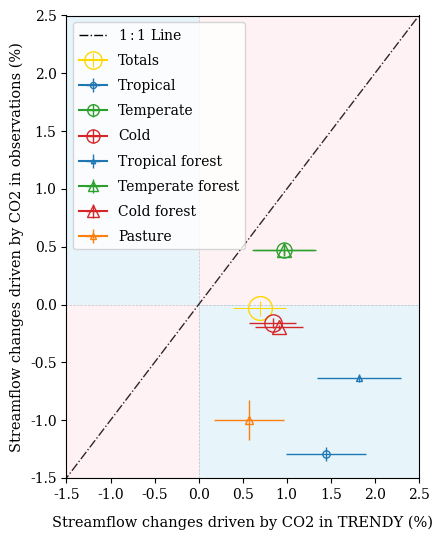

In [3]:
# Plotting Extended Data Fig. 2b (Figure S2b)
def Figure_2b():
    data = pd.read_excel("dataset/result.xlsx")
    DATA = pd.read_csv("dataset/trendy_all.csv")
    T = data['Trendy_CO2_%']
    S = data['Observations_CO2_%']
    climates = data['Main_climate']
    pasture = data['pasture']
    forest = data['forest']
    Index = data['Index']

    climates = climates[Index==1]
    pasture = pasture[Index==1]
    forest = forest[Index==1]
    S = S[Index == 1]
    T = T[Index == 1]

    DATA = np.array(DATA)[:, 1:]
    DATA = DATA.T

    Td1 = np.zeros((len(S), 15))
    s = 0
    for j in range(len(Index)):
        if Index[j] == 1:
            Td1[s, :] = DATA[j, :]
            s = s + 1

    T1 = np.copy(T)
    S1 = np.copy(S)
    climates1 = np.copy(climates)
    forest1 = np.copy(forest)
    pasture1 = np.copy(pasture)
    Td1 = np.copy(Td1)

    def c1():
        S11 = np.copy(S1)
        # Calculate sample median and sample variance
        # Because of the presence of outliers in TRENDY,
        # only 1%-99% of the overall data is retained
        # when calculating the sample variance.
        t_median = np.nanmedian(Td1)
        k1 = np.nanpercentile(Td1, 99)
        k2 = np.nanpercentile(Td1, 1)
        Td11 = Td1[Td1<k1]
        Td11 = Td11[Td11>k2]
        t_var = np.nanvar(Td11)
        s_median = np.median(S11)
        s_var = np.var(S11)
        return t_median, s_median, t_var, s_var, len(S11)


    def c2(d_here1, cli1, k):
        if k == -1:
            T11 = np.copy(T1)
            S11 = np.copy(S1)
            d_here11 = np.copy(d_here1)
        else:
            T11 = T1[cli1 == k]
            S11 = S1[cli1 == k]
            d_here11 = d_here1[cli1 == k]
        # Calculate sample median and sample variance
        # Because of the presence of outliers in TRENDY,
        # only 1%-99% of the overall data is retained
        # when calculating the sample variance.
        k1 = np.nanpercentile(Td1, 99)
        k2 = np.nanpercentile(Td1, 1)
        d_here01 = []
        for i in range(15):
            d_here2 = Td1[:, i]
            if k != -1:
                d_here3 = d_here2[cli1==k]
                d_here4 = d_here3[d_here11>50]
            else:
                d_here4 = d_here2[d_here11>50]
            d_here01 = np.append(d_here01, d_here4)
        d_here01 = d_here01[d_here01 < k1]
        d_here01 = d_here01[d_here01 > k2]

        s_median = np.median(S11[d_here11 > 50])
        s_var = np.var(S11[d_here11 > 50])
        t_median = np.nanmedian(T11[d_here11 > 50])
        t_var = np.nanvar(d_here01)

        return t_median, s_median, t_var, s_var, len(S11[d_here11 > 50])


    def c3(cli1, k):
        T11 = T1[cli1 == k]
        S11 = S1[cli1 == k]

        # Calculate sample median and sample variance
        # Because of the presence of outliers in TRENDY,
        # only 1%-99% of the overall data is retained
        # when calculating the sample variance.
        k1 = np.nanpercentile(Td1, 99)
        k2 = np.nanpercentile(Td1, 1)
        d_here01 = []
        for i in range(15):
            d_here2 = Td1[:, i]
            d_here4 = d_here2[cli1==k]
            d_here01 = np.append(d_here01, d_here4)
        d_here01 = d_here01[d_here01 < k1]
        d_here01 = d_here01[d_here01 > k2]

        s_median = np.median(S11)
        s_var = np.var(S11)
        t_median = np.nanmedian(T11)
        t_var = np.nanvar(d_here01)

        return t_median, s_median, t_var, s_var, len(S11)


    fig = plt.figure(figsize=(4.5, 5.5))
    ax = fig.add_subplot(111)
    # Picture Background Drawing
    ax.bar(x=0.2, height=0.4, width=0.4, bottom=-0.4, color='skyblue', alpha=0.2)
    ax.bar(x=-0.2, height=0.4, width=0.4, bottom=0.0, color='skyblue', alpha=0.2)
    ax.bar(x=0.2, height=0.4, width=0.4, bottom=0.0, color='pink', alpha=0.2)
    ax.bar(x=-0.2, height=0.4, width=0.4, bottom=-0.4, color='pink', alpha=0.2)

    # Median, variance, sample size variables
    Tm, Sm, Tv, Sv, Size = [], [], [], [], []

    # Results of the totals
    t_median, s_median, t_std, s_std, size = c1()
    Tm.append(t_median)
    Sm.append(s_median)
    Tv.append(t_std)
    Sv.append(s_std)
    Size.append(size)

    # Climate zone results: 0-Tropical, 2-Temperate, 3-Cold, others are less than 45
    for i in [0, 2, 3]:
        t_median, s_median, t_std, s_std, size = c3(climates1, i)
        Tm.append(t_median)
        Sm.append(s_median)
        Tv.append(t_std)
        Sv.append(s_std)
        Size.append(size)

    # Forest-climate zone results
    for i in [0, 2, 3]:
        t_median, s_median, t_std, s_std, size = c2(forest1, climates1, i)
        Tm.append(t_median)
        Sm.append(s_median)
        Tv.append(t_std)
        Sv.append(s_std)
        Size.append(size)

    # Pasture results
    t_median, s_median, t_std, s_std, size = c2(pasture1, climates1, -1)
    Tm.append(t_median)
    Sm.append(s_median)
    Tv.append(t_std)
    Sv.append(s_std)
    Size.append(size)

    print("Number of totals: %d catchments"%(Size[0]))
    print("Number of tropical: %d catchments"%(Size[1]))
    print("Number of temperate: %d catchments"%(Size[2]))
    print("Number of cold: %d catchments"%(Size[3]))
    print("Number of tropical forest: %d catchments"%(Size[4]))
    print("Number of temperate forest: %d catchments"%(Size[5]))
    print("Number of cold forest: %d catchments"%(Size[6]))
    print("Number of pasture: %d catchments"%(Size[7]))

    color = ['Gold', '#1f77b4', '#2ca02c', '#d62728', '#1f77b4', '#2ca02c', '#d62728', '#ff7f0e', '#9467bd']
    label_here = ['Totals', 'Tropical', 'Temperate', 'Cold', 'Tropical forest', 'Temperate forest', 'Cold forest',
                  'Pasture']

    # Plotting the scatterplot
    i = 0
    ax.errorbar(Tm[i], Sm[i], xerr=Tv[i], yerr=Sv[i], elinewidth=0.75, alpha=1, color=color[0],
                marker='o', markerfacecolor='None', markeredgecolor=color[0],
                markersize=Size[i] ** 0.45)

    for i in [1, 2, 3, 4, 5, 6, 7]:
        if i in [4, 5, 6, 7]:
            ax.errorbar(Tm[i], Sm[i], xerr=Tv[i], yerr=Sv[i], elinewidth=1, alpha=1, color=color[i],
                        marker='^', markerfacecolor='None', markeredgecolor=color[i],
                        markersize=Size[i] ** 0.45)
        else:
            ax.errorbar(Tm[i], Sm[i], xerr=Tv[i], yerr=Sv[i], elinewidth=1, alpha=1, color=color[i],
                    marker='o', markerfacecolor='None', markeredgecolor=color[i],
                    markersize=Size[i]**0.45)

    # Drawing legend
    for i in [0, 1, 2, 3, 4, 5, 6, 7]:
        if i in [0]:
            ax.errorbar(-999, -999, xerr=Tv[i], yerr=Sv[i], elinewidth=0.75, alpha=1, color=color[0],
                        marker='o', markerfacecolor='None', markeredgecolor=color[0],
                        markersize=Size[i] ** 0.4,
                        label='Totals'
                        )
        elif i in [4, 5, 6, 7]:
            ax.errorbar(-999, -999, xerr=Tv[i], yerr=Sv[i], elinewidth=1, alpha=1, color=color[i],
                        marker='^', markerfacecolor='None', markeredgecolor=color[i],
                        markersize=Size[i]**0.4, label=label_here[i])
        else:
            ax.errorbar(-999, -999, xerr=Tv[i], yerr=Sv[i], elinewidth=1, alpha=1, color=color[i],
                    marker='o', markerfacecolor='None', markeredgecolor=color[i],
                    markersize=Size[i]**0.4, label=label_here[i])

    # Drawing Key Lines
    plt.plot([0, 0], [-1, 1], color='gray', ls='--', linewidth=0.5, zorder=0, alpha=0.5)
    plt.plot([-1, 1], [0, 0], color='gray', ls='--', linewidth=0.5, zorder=0, alpha=0.5)
    plt.plot([-1, 1], [-1, 1], color='k', ls='-.', linewidth=1.0, zorder=0, label='1$:$1 Line', alpha=1)

    # Setting Coordinates and Units
    plt.xticks([-0.015 + 0.005 * i for i in range(9)], [-1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5],
               family='serif', fontsize=10)
    plt.yticks([-0.015 + 0.005 * i for i in range(9)], [-1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5],
               family='serif', fontsize=10)
    plt.xlim([-0.015, 0.025])
    plt.ylim([-0.015, 0.025])

    # Setting Axis Labels
    plt.xlabel('Streamflow changes driven by CO2 in TRENDY (%)', family='serif', loc='center',
               fontsize=10.5, labelpad=10)
    plt.ylabel('Streamflow changes driven by CO2 in observations (%)', family='serif',
               loc='center',
               fontsize=10.5)
    legend_font = {
        'family': 'serif',
        'style': 'normal',
        'size': 10,
        'weight': "normal",
    }
    plt.legend(loc='upper left', prop=legend_font, labelspacing=0.8)

    fig.patch.set_alpha(0)
    plt.tight_layout()
    plt.rcParams['savefig.dpi'] = 1200
    plt.show()
Figure_2b()